In [1]:
import numpy as np
import pandas as pd
import PersistenceImages.persistence_images as pimg

from ripser import Rips
from scipy.io import loadmat
from matplotlib import pyplot as plt

#### TODO (DB):
- Improve visualization of persistence images for $H_0$ (horizontal orientation, 1-D intensity plot)
- Calculate persistence imgs for all wells and compute Euclidean distance between persistance imgs
    - $\frac{1}{nx \times ny} \sum_{x}\sum_{y} |I_1(x,y) - I_2(x,y)|^2$
    - Separate heatmaps for $H_0$ and $H_1$

#### Load data

In [2]:
exp_dat = loadmat('experimental-data/EGF(E6)w5.mat')
posX = exp_dat['storeX']
posY = exp_dat['storeY']
(max_cells, max_time) = np.shape(posX)
pos_last_x = posX[:, max_time-1]
pos_last_y = posY[:, max_time-1]
pos_last_x = pos_last_x[~np.isnan(pos_last_x)]
pos_last_y = pos_last_y[~np.isnan(pos_last_y)]

#### Compute persistence homology with Ripser

In [3]:
rips = Rips()
dgms = rips.fit_transform(np.transpose(np.array([pos_last_x, pos_last_y])))

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


#### Plot persistence diagram

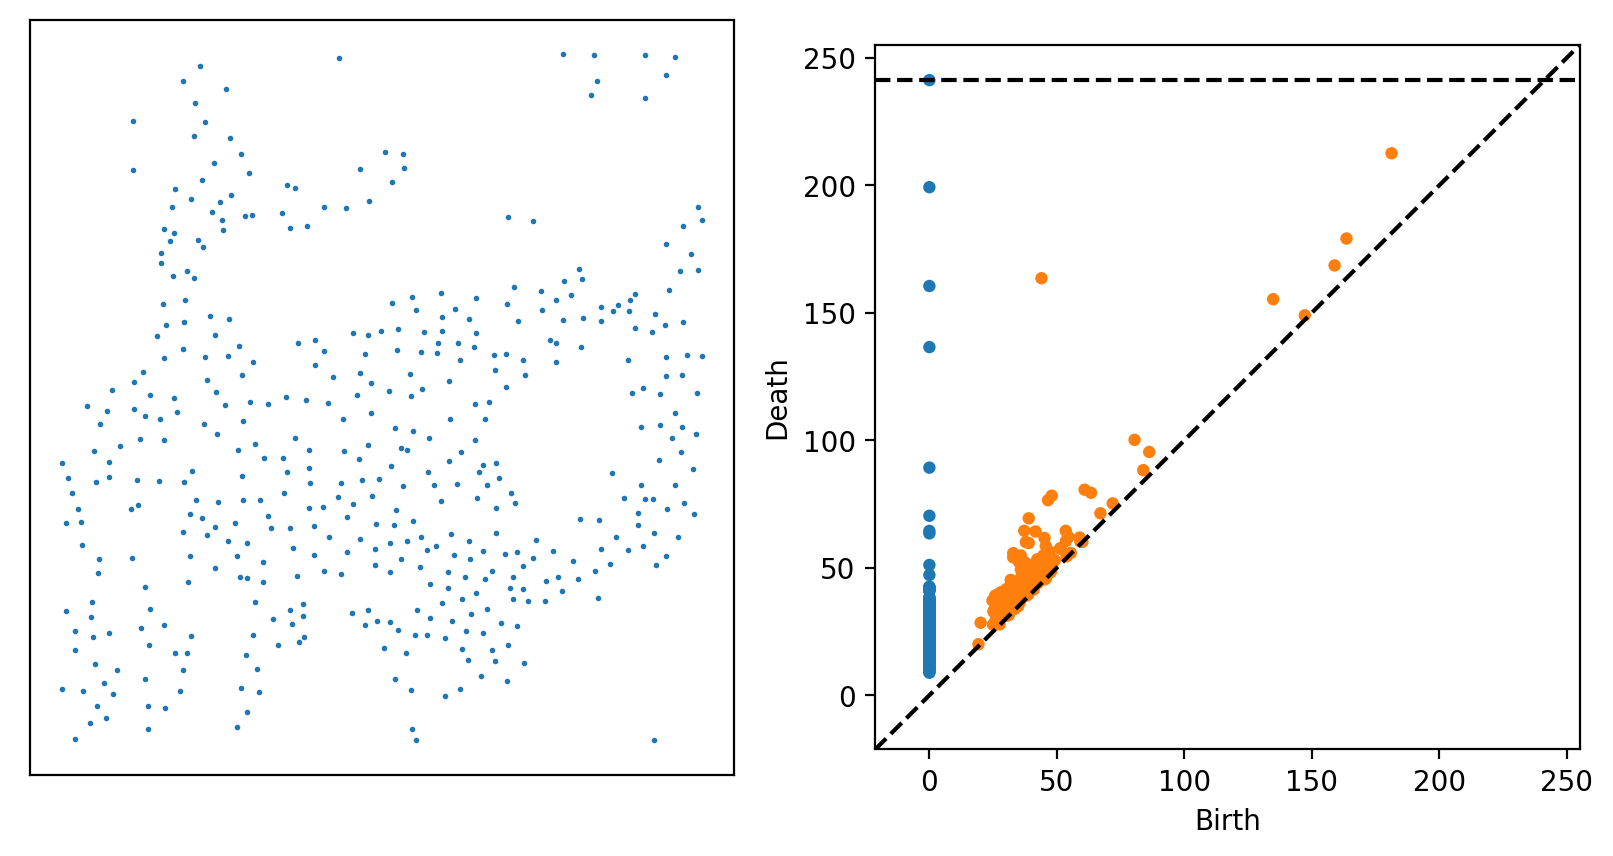

In [4]:
plt.figure(figsize=(10,5), dpi=200)
plt.subplot(121)
plt.scatter(pos_last_x, pos_last_y, s=1)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.show()

#### Compute pesistence image for $H_0$

In [22]:
pers_imager = pimg.PersistenceImager()
pers_imager.pixel_size = 0.05
pers_imager.birth_range = (0, 2)
pers_imager.pers_range = (0, 210)
pers_imager.weight = pimg.weighting_fxns.persistence
pers_imager.weight_params = {'n': 2}
pers_imager.kernel_params = {'sigma': 3.0}
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.05 
  resolution: (40, 4200) 
  birth range: (0, 2) 
  persistence range: (0, 210) 
  weight: persistence 
  kernel: bvncdf 
  weight parameters: {n: 2} 
  kernel parameters: {sigma: 3.0}


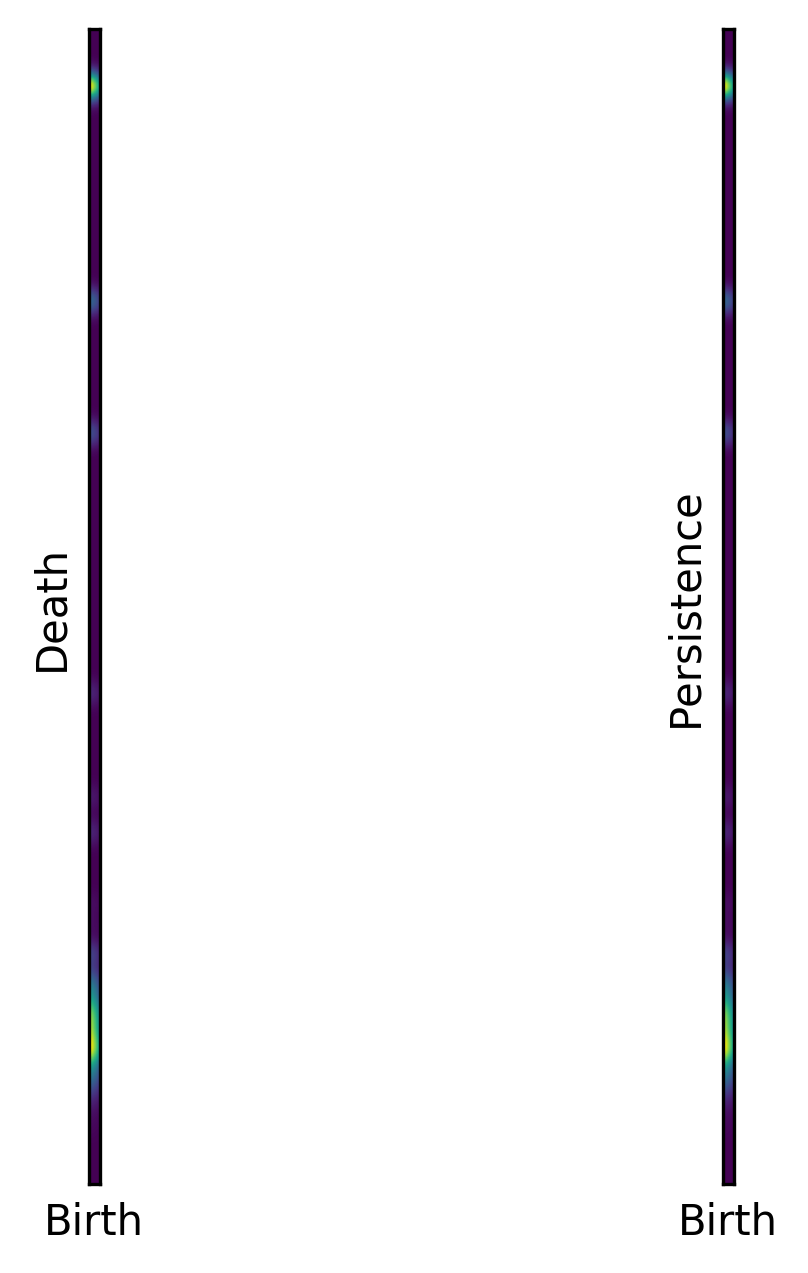

In [29]:
dgms[0][-1] = [0.0, 200]
pers_img_bd = pers_imager.transform(dgms[0], skew=False)
pers_img_bp = pers_imager.transform(dgms[0], skew=True)

plt.figure(figsize=(5,5), dpi=300)
plt.subplot(121)
plt.imshow(np.flipud(np.transpose(pers_img_bd)))
plt.xticks([])
plt.yticks([])
plt.xlabel('Birth')
plt.ylabel('Death')

plt.subplot(122)
plt.imshow(np.flipud(np.transpose(pers_img_bp)))
plt.xticks([])
plt.yticks([])
plt.xlabel('Birth')
plt.ylabel('Persistence')

plt.show()

#### Compute persistence image for $H_1$

In [40]:
pers_imager = pimg.PersistenceImager()
pers_imager.pixel_size = 0.2
pers_imager.birth_range = (0, 220)
pers_imager.pers_range = (0, 220)
pers_imager.weight = pimg.weighting_fxns.persistence
pers_imager.weight_params = {'n': 2}
pers_imager.kernel_params = {'sigma': 3.0}
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.2 
  resolution: (1100, 1100) 
  birth range: (0, 220) 
  persistence range: (0, 220) 
  weight: persistence 
  kernel: bvncdf 
  weight parameters: {n: 2} 
  kernel parameters: {sigma: 3.0}


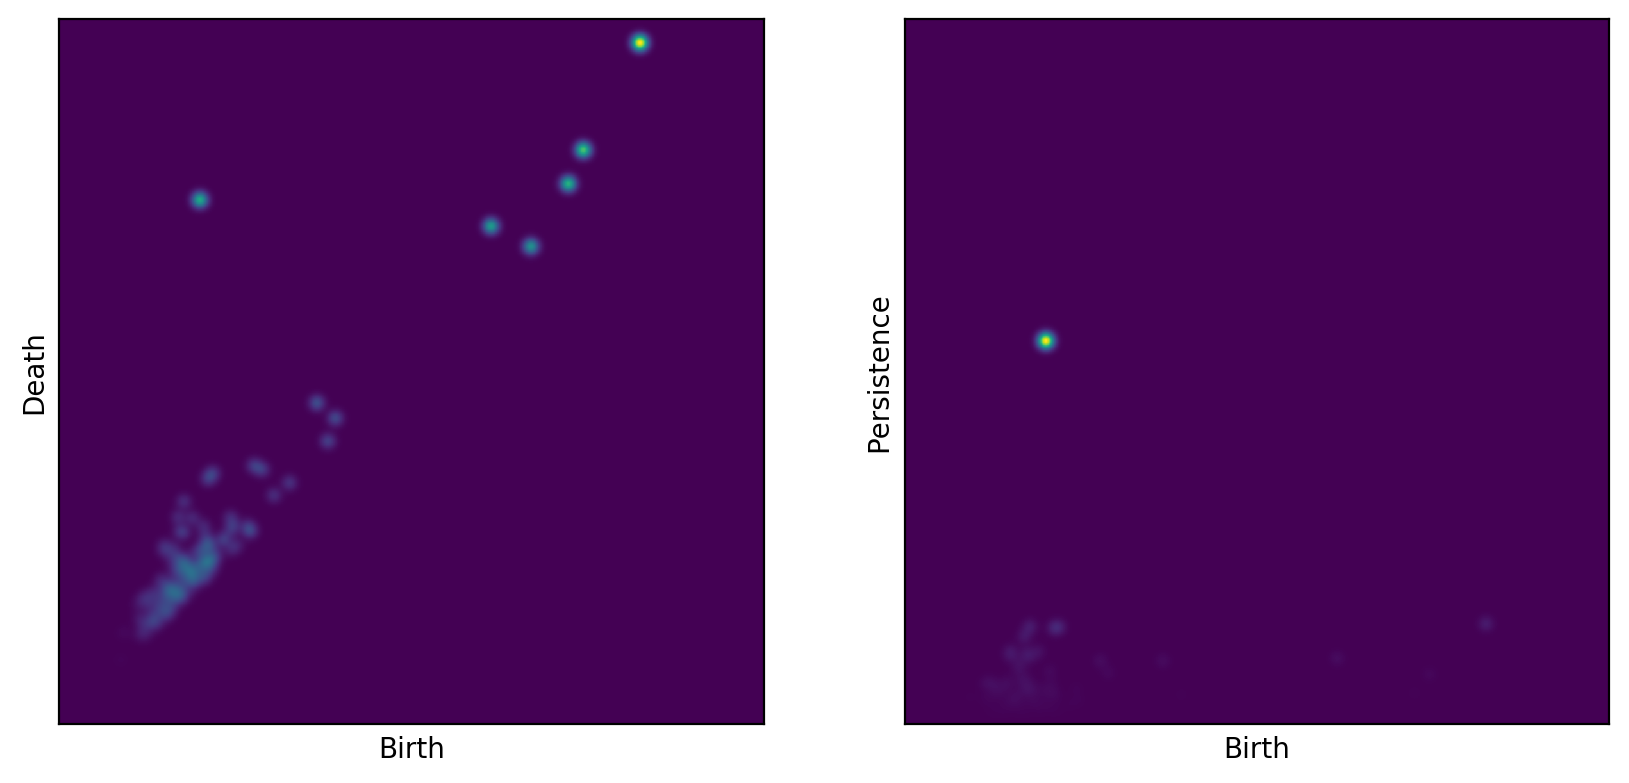

In [41]:
pers_img_bd = pers_imager.transform(dgms[1], skew=False)
pers_img_bp = pers_imager.transform(dgms[1], skew=True)

plt.figure(figsize=(10,5), dpi=200)
plt.subplot(121)
plt.imshow(np.flipud(np.transpose(pers_img_bd)))
plt.xticks([])
plt.yticks([])
plt.xlabel('Birth')
plt.ylabel('Death')

plt.subplot(122)
plt.imshow(np.flipud(np.transpose(pers_img_bp)))
plt.xticks([])
plt.yticks([])
plt.xlabel('Birth')
plt.ylabel('Persistence')

plt.show()

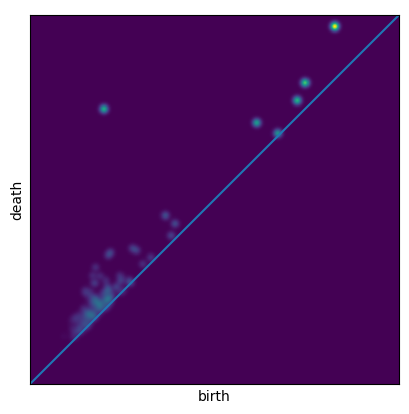

In [43]:
pers_imager.plot_image(dgms[1], skew=False)